In [1]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys


In [3]:
sys.path.append(os.path.join(os.path.abspath('..')))
# Import modules
from src import data_loader as dl

In [8]:

sys.path.append(os.path.abspath("../"))

# Now import your scripts
from scripts import univariate as uni
from scripts import bivariate as bi
from scripts.FeatureEngineering import FeatureEngineering as fe  
from scripts.logger import logger 

In [9]:
# Use raw strings or double backslashes for file paths
fraud_df = dl.load_data("Fraud_Data.csv")
ip_df = dl.load_data("ipAddress_to_Country.csv")
credit_df = dl.load_data("creditcard.csv")

In [10]:
print("head of the Fraud_Data.csv ")
fraud_df.head()


head of the Fraud_Data.csv 


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [11]:
print("head of the Fraud_Data.csv ")
ip_df.head()

head of the Fraud_Data.csv 


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [12]:
print("head of the Fraud_Data.csv ")
credit_df.head()

head of the Fraud_Data.csv 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


Check for duplicate rows in the DataFrame

In [14]:

duplicate_count = fraud_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [15]:

duplicate_count = ip_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [16]:

duplicate_count = credit_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1081


In [17]:
# Remove duplicates in the credit card data
credit_df = credit_df.drop_duplicates()
duplicate_count = credit_df.duplicated().sum()
print(f"Number of duplicate rows after drop duplicate : {duplicate_count}")

Number of duplicate rows after drop duplicate : 0


ip address and fraud data has no duplicate and but the credite data has 1081 duplicate values i just remove it using drop_duplicates

○	Correct data types

In [18]:
# Data types 

print(fraud_df.dtypes)


user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


In [19]:
# Correct data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['purchase_value'] = fraud_df['purchase_value'].astype(float)
fraud_df['ip_address'] = fraud_df['ip_address'].astype(int)

# Verify corrected data types
print(fraud_df.dtypes)


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object


### Correct Data Types
 signup_time and purchase_time: Convert to datetime.
 purchase_value: Convert to float.
 ip_address  converted to  int64

In [20]:
print(ip_df.dtypes)

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [21]:
# Correct data types
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)

# Verify corrected data types
print(ip_df.dtypes)


lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object


change the lower_bound_ip_addreess from float64 to int64

In [22]:
print(credit_df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


no need of Correct data types in credit_df

3.	Exploratory Data Analysis (EDA)
○	Univariate analysis
○	Bivariate analysis


# Univariate Analysis on Fraud Data


Summary Statistics for Fraud Data:
              user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000     

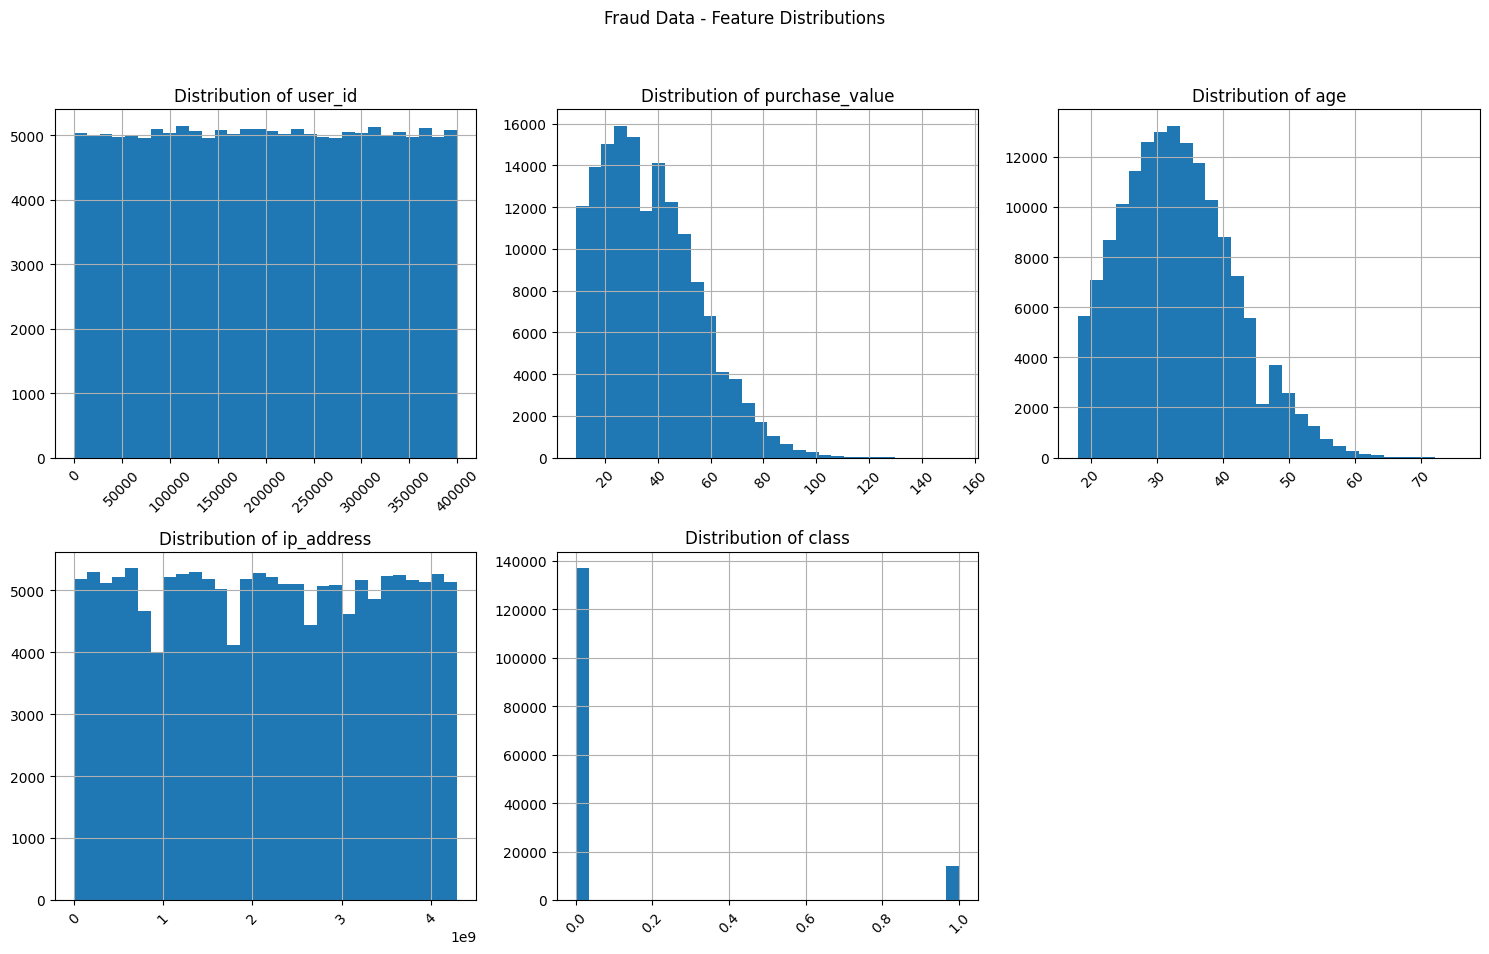

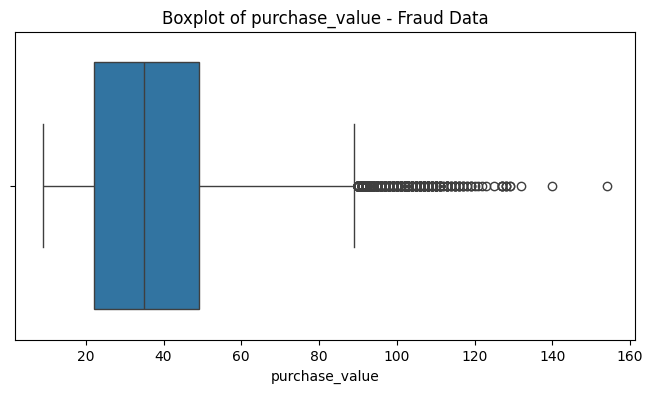

In [23]:

uni.summary_statistics(fraud_df, "Fraud Data")
uni.plot_histograms(fraud_df, "Fraud Data")
uni.plot_boxplots(fraud_df, ["purchase_value"], "Fraud Data")

# Univariate Analysis on Credit Card Data


Summary Statistics for Credit Card Data:
                 Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.

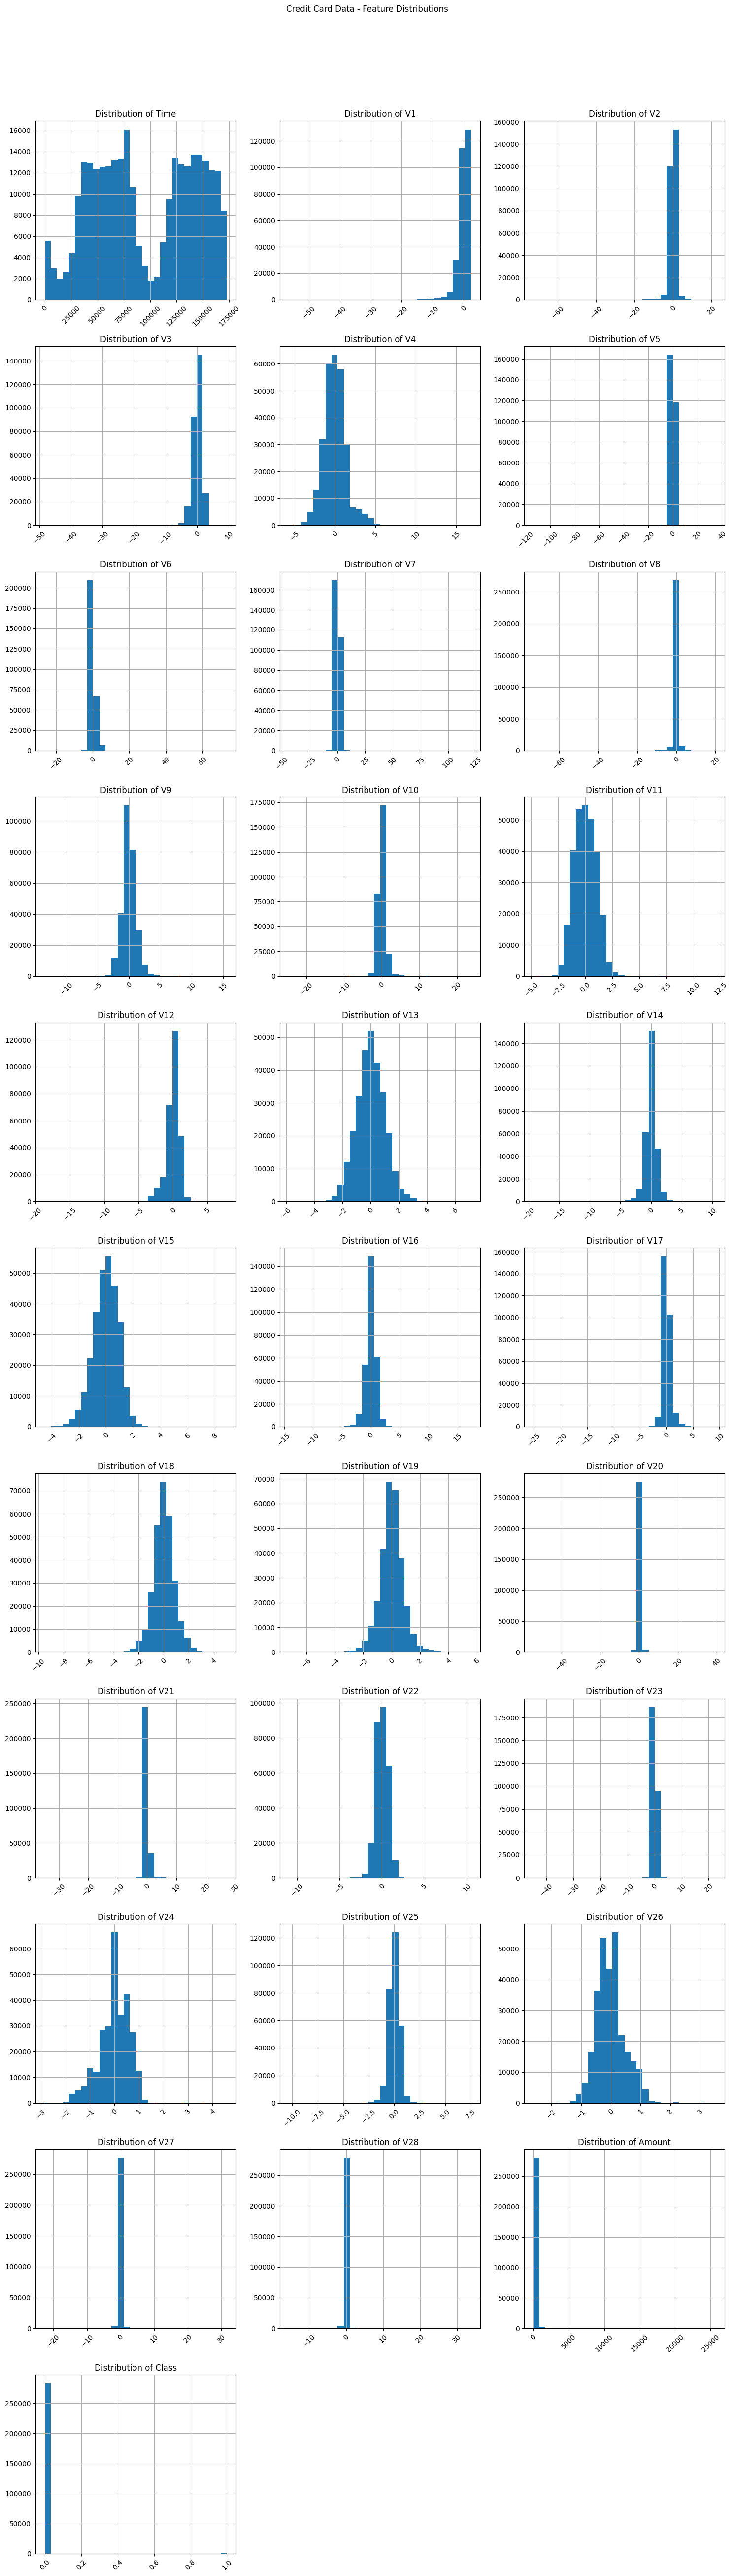

In [24]:

uni.summary_statistics(credit_df, "Credit Card Data")
uni.plot_histograms(credit_df, "Credit Card Data")

# Bivariate Analysis

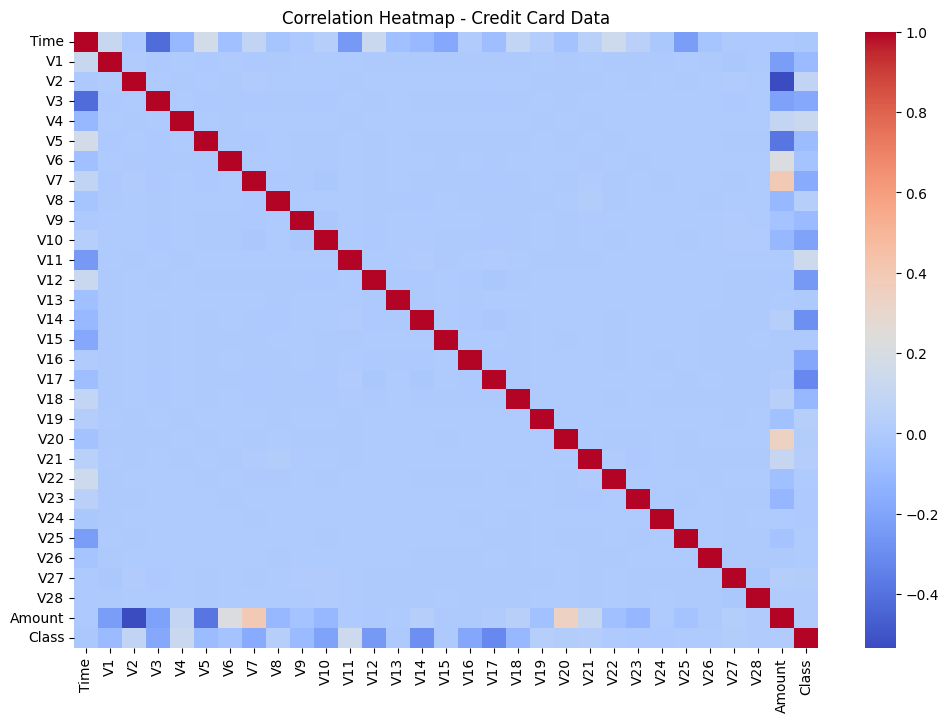

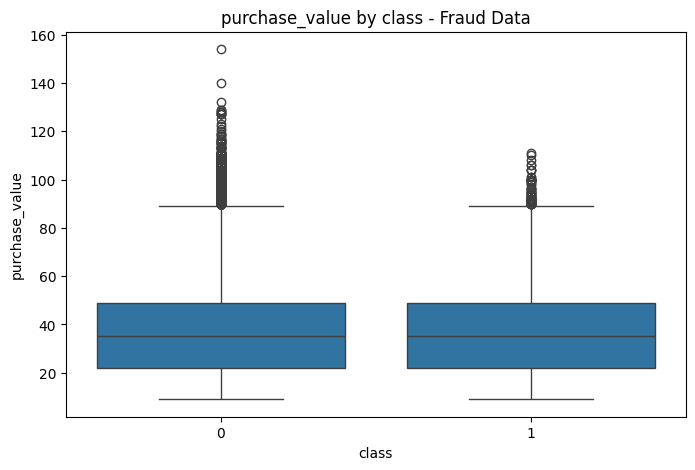

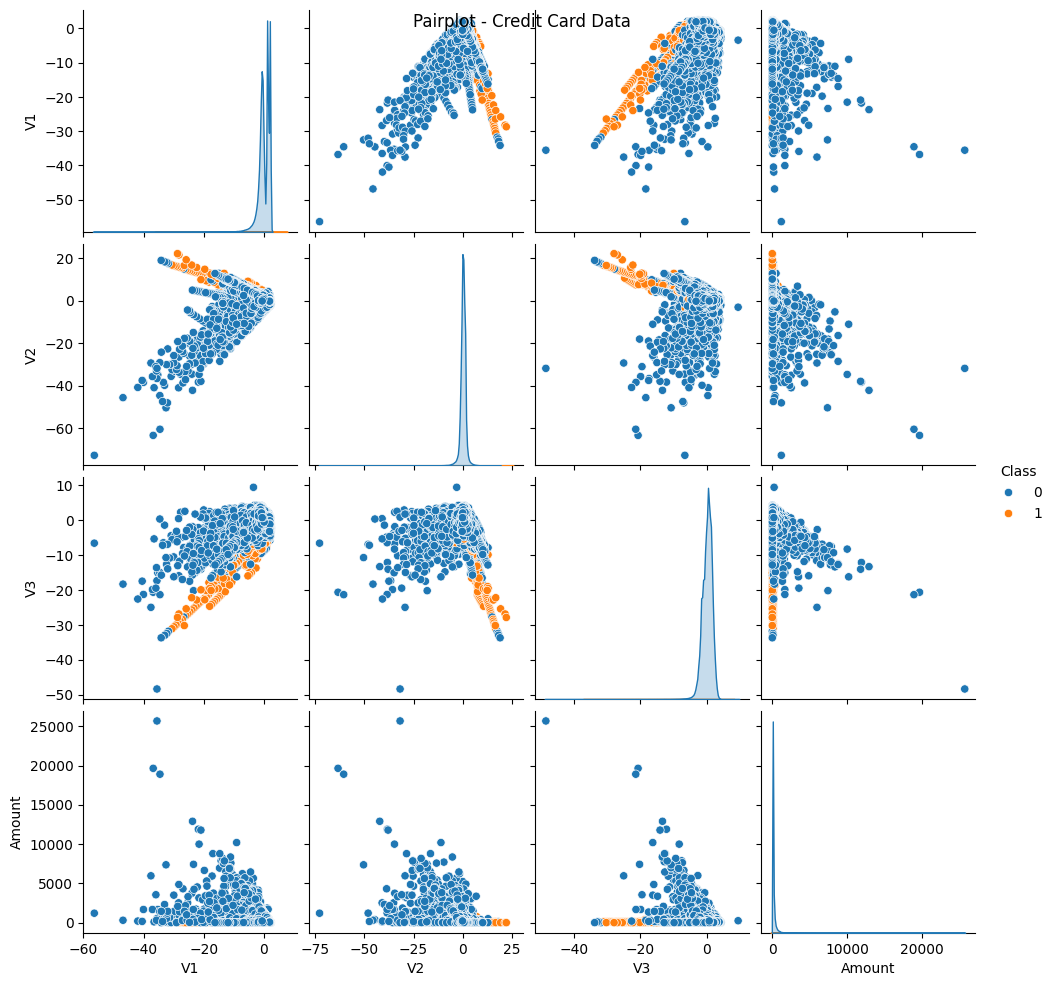

In [25]:

bi.correlation_heatmap(credit_df, "Credit Card Data")
bi.plot_boxplot(fraud_df, "class", "purchase_value", "Fraud Data")
bi.pairplot_features(credit_df, ["V1", "V2", "V3", "Amount", "Class"], "Class", "Credit Card Data")


# Merge fraud_df with ip_df based on the IP address range

In [26]:

merged_df = pd.merge(
    fraud_df,
    ip_df,
    how='left',
    left_on='ip_address',
    right_on='lower_bound_ip_address'
)

# Filter to include rows where the ip_address is within the range of lower and upper bound
merged_df = merged_df[(merged_df['ip_address'] >= merged_df['lower_bound_ip_address']) & (merged_df['ip_address'] <= merged_df['upper_bound_ip_address'])]

# Drop the unnecessary columns
merged_df = merged_df.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address'])

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Create the data folder if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
    print("Created 'data' folder.")

# Save the merged DataFrame to the data folder
merged_df.to_csv('../data/merged_data.csv', index=False)

# Confirm the file is saved
print("Merged data has been saved as '(''../data/merged_data.csv''.")


       user_id         signup_time       purchase_time  purchase_value  \
24727    99475 2015-01-15 22:52:56 2015-03-21 05:26:58            55.0   
32485    39268 2015-05-09 17:42:56 2015-06-04 05:13:18            36.0   
35932    92325 2015-01-16 19:47:30 2015-05-03 17:19:26            27.0   
37431   390559 2015-07-09 06:36:13 2015-09-22 04:07:00            51.0   
52243   383733 2015-04-09 12:13:47 2015-07-22 23:48:13            42.0   

           device_id  source browser sex  age  ip_address  class  \
24727  KKQVQFEISXTQI     Ads      IE   M   25  3436291840      0   
32485  LVTPXQBECONJX     SEO      IE   F   27  3256946176      0   
35932  IYIBXBGTIDAUY  Direct  Chrome   M   30  3495475200      0   
37431  SKNQFVNNGMSXY     Ads  Safari   M   24  1613234176      0   
52243  PFHACSCWDLWUA     SEO  Chrome   F   45  3469070080      0   

             country  
24727         Canada  
32485        Romania  
35932         Canada  
37431  United States  
52243  United States  
Created 

In [27]:


# Initialize FeatureEngineering with fraud_df
feature_engineering = fe(fraud_df, logger)

# Run the feature engineering pipeline
feature_engineering.pipeline()

# Retrieve the processed data
processed_data = feature_engineering.get_processed_data()

# Display the first few rows of the processed DataFrame
processed_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,hour_of_day,day_of_week,...,user_transaction_frequency,device_transaction_frequency,user_transaction_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,732758368,0,-1.377455,0.991020,...,0.0,-0.261514,-0.230128,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,350311387,0,-1.522122,-1.501259,...,0.0,-0.261514,-0.229874,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2621473820,1,0.937208,-0.005891,...,0.0,3.941861,4.345476,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3840542443,0,0.213876,-1.501259,...,0.0,-0.261514,-0.230120,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,415583117,0,0.937208,-0.504347,...,0.0,-0.261514,-0.230128,False,False,False,False,False,True,True


In [29]:
# Save the processed datase to the csv for modeling
processed_data.to_csv('../data/processed/processed_fraud_data.csv')
